In [7]:
import pandas
import numpy
from RexR import *
import _helpers
Rocket = RexR(datalocation = None, #'_data/genomic_data/data.pkl', 
              seed = 3123, 
              debug = False, 
              write_out=True,
              set_name = 'MELA') # data to read in ALL_10, or MELA
Rocket.load_probeset_data();

%matplotlib inline
%load_ext autoreload
%autoreload 2

++++++++++++++++++++++++++++++ Firing up RexR! ++++++++++++++++++++++++++++++
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Classification

In [8]:
METHOD_LIST = ['ExtraTrees', 'RandomForest', 'GBM', 'AdaBoost', 'LR', 'SVM', 'NaiveBayes', 'MLNN'] # XGB
Runs = []
nruns = 2
SCALER = "minmax"
GROUPING = "mean"
DIM_TYPE = None # "LDA" # "LDA" # "LDA"
DIM_NUM = 1000
Results = None
ACC = pd.DataFrame()
Rocket.VIZ = False
for i in range(0, nruns):
    Rocket.SEED = np.random.randint(0,10000)
    MODELS  = []
    for idx, METHOD in enumerate(METHOD_LIST):
        preds, class_model, accuracy = Rocket.classify_treatment(model_type = METHOD, 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
        MODELS.append({'method': METHOD, 'model': class_model})
        ACC = ACC.append(accuracy, ignore_index= True)
        preds = [pred_[1]for pred_ in preds]
        #len(Rocket.DATA_merged[Rocket.DATA_merged["array-batch"].isin(["cohort 1", "cohort 2", "JB", "IA", "ALL-10"])])
        if Results is None:
            Results = Rocket.DATA_merged_processed.copy()
        Results['pred'] = preds
        Results['method'] = METHOD
        if idx == 0:
            AllResults = Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]]
        else:
            AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 
                                                    'pred', 
                                                    'method', 
                                                    Rocket.MODEL_PARAMETERS['target']]], 
                                      ignore_index = True)

    ####
    ####

    preds, class_model, accuracy = Rocket.classify_treatment(model_type = "RVM", 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
    MODELS.append({'method': METHOD, 'model': class_model})
    ACC = ACC.append(accuracy, ignore_index = True)
    Results = Rocket.DATA_merged_processed.copy()
    preds = [pred_ for pred_ in preds]
    Results['pred'] = preds
    Results['method'] = "RVM"
    AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]], ignore_index = True)

    ####
    ####

    preds, class_model, accuracy = Rocket.classify_treatment(model_type = "DNN", 
                                                      features = 'genomic',
                                                      parameters = {},
                                                      pipeline = {"scaler": {"type": SCALER},
                                                                  "pre_processing": {"patient_grouping": GROUPING, 
                                                                                     "bias_removal": False},
                                                                  "dim_reduction": {"type": DIM_TYPE, "n_comp": DIM_NUM},
                                                                  "feature_selection": {"type": "RFECV", "top_n": 100}})
    MODELS.append({'method': METHOD, 'model': class_model})
    ACC = ACC.append(accuracy, ignore_index = True)
    Results = Rocket.DATA_merged_processed.copy()
    preds = [pred_ for pred_ in preds]
    Results['pred'] = preds
    Results['method'] = "DNN"
    AllResults = AllResults.append(Results[[Rocket.MODEL_PARAMETERS['ID'], 'pred', 'method', Rocket.MODEL_PARAMETERS['target']]],
                                   ignore_index = True)

    AllResults[Rocket.MODEL_PARAMETERS['ID']] = AllResults[Rocket.MODEL_PARAMETERS['ID']].astype('str')
    AllResults = AllResults.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
    #AllResults[AllResults['Treatment_risk_group_in_ALL10'].notnull()]
    ####
    ####
    Runs.append(AllResults)



+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Prepping data, this may take a while..
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  Grouping probesets
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (83, 22215) and class vector (83,)
MODEL: ET accuracy:  0.915662650602 +/-: 0.00216451679622
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (83, 22215) and class vector (83,)
MODEL: RF accuracy:  0.903614457831 +/-: 0.00333385277467
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,

 120 - L= 2.9980318 - Gamma=29.9327089 (M=  35) - s=0.0100
 121 - L= 2.9980321 - Gamma=29.9300193 (M=  35) - s=0.0100
 122 - L= 2.9980323 - Gamma=29.9310666 (M=  35) - s=0.0100
 123 - L= 2.9980325 - Gamma=29.9310688 (M=  35) - s=0.0100
 124 - L= 2.9980326 - Gamma=29.9295786 (M=  35) - s=0.0100
 125 - L= 2.9980328 - Gamma=29.9295758 (M=  35) - s=0.0100
 126 - L= 2.9980329 - Gamma=29.9298327 (M=  35) - s=0.0100
 127 - L= 2.9980330 - Gamma=29.9343987 (M=  35) - s=0.0100
 128 - L= 2.9980332 - Gamma=29.9305723 (M=  35) - s=0.0100
 129 - L= 2.9980333 - Gamma=29.9339505 (M=  35) - s=0.0100
 130 - L= 2.9980334 - Gamma=29.9339470 (M=  35) - s=0.0100
 131 - L= 2.9980335 - Gamma=29.9339437 (M=  35) - s=0.0100
 132 - L= 2.9980336 - Gamma=29.9339384 (M=  35) - s=0.0100
 133 - L= 2.9980337 - Gamma=29.9339410 (M=  35) - s=0.0100
 134 - L= 2.9980338 - Gamma=29.9335873 (M=  35) - s=0.0100
 135 - L= 2.9980339 - Gamma=29.9378238 (M=  35) - s=0.0100
 136 - L= 2.9980340 - Gamma=29.9359377 (M=  35) - s=0.01

 112 - L= 3.0044917 - Gamma=30.9164481 (M=  36) - s=0.0100
 113 - L= 3.0044925 - Gamma=30.9058213 (M=  36) - s=0.0100
 114 - L= 3.0044937 - Gamma=30.9175601 (M=  36) - s=0.0100
 115 - L= 3.0044942 - Gamma=30.9175966 (M=  36) - s=0.0100
 116 - L= 3.0044947 - Gamma=30.9281375 (M=  37) - s=0.0100
 117 - L= 3.0044953 - Gamma=30.9187212 (M=  37) - s=0.0100
 118 - L= 3.0044957 - Gamma=30.9155048 (M=  37) - s=0.0100
 119 - L= 3.0044964 - Gamma=30.9253349 (M=  37) - s=0.0100
 120 - L= 3.0044970 - Gamma=30.9156639 (M=  37) - s=0.0100
 121 - L= 3.0044975 - Gamma=30.9145664 (M=  37) - s=0.0100
 122 - L= 3.0044980 - Gamma=30.9224649 (M=  37) - s=0.0100
 123 - L= 3.0044985 - Gamma=30.9205603 (M=  37) - s=0.0100
 124 - L= 3.0044989 - Gamma=30.9229732 (M=  37) - s=0.0100
 125 - L= 3.0044992 - Gamma=30.9299656 (M=  37) - s=0.0100
 126 - L= 3.0044997 - Gamma=30.9217625 (M=  37) - s=0.0100
 127 - L= 3.0045001 - Gamma=30.9227022 (M=  37) - s=0.0100
 128 - L= 3.0045005 - Gamma=30.9314970 (M=  37) - s=0.01

C:\Users\Bram van Es\DEV\RexR\rvm.py:289: RuntimeWarning: invalid value encountered in log
  change = np.abs(np.log(newAlpha) - np.log(self.Alpha[j]))


  93 - L= 3.0401888 - Gamma=29.8058147 (M=  34) - s=0.0100
  94 - L= 3.0402032 - Gamma=29.8159517 (M=  34) - s=0.0100
  95 - L= 3.0402112 - Gamma=29.8599147 (M=  35) - s=0.0100
  96 - L= 3.0402171 - Gamma=29.8610218 (M=  35) - s=0.0100
  97 - L= 3.0402232 - Gamma=29.8808438 (M=  35) - s=0.0100
  98 - L= 3.0402291 - Gamma=29.8747844 (M=  35) - s=0.0100
  99 - L= 3.0402341 - Gamma=29.8745224 (M=  35) - s=0.0100
 100 - L= 3.0402389 - Gamma=29.8945307 (M=  35) - s=0.0100
 101 - L= 3.0402427 - Gamma=29.8687771 (M=  34) - s=0.0100
 102 - L= 3.0402466 - Gamma=29.8640442 (M=  34) - s=0.0100
 103 - L= 3.0402504 - Gamma=29.8641011 (M=  34) - s=0.0100
 104 - L= 3.0402535 - Gamma=29.8640835 (M=  34) - s=0.0100
 105 - L= 3.0402555 - Gamma=29.8584918 (M=  34) - s=0.0100
 106 - L= 3.0402573 - Gamma=29.8582419 (M=  34) - s=0.0100
 107 - L= 3.0402589 - Gamma=29.8682494 (M=  34) - s=0.0100
 108 - L= 3.0402606 - Gamma=29.8656556 (M=  34) - s=0.0100
 109 - L= 3.0402625 - Gamma=29.8708871 (M=  34) - s=0.01

 103 - L= 3.0860645 - Gamma=30.2754367 (M=  37) - s=0.0100
 104 - L= 3.0860932 - Gamma=30.2718883 (M=  37) - s=0.0100
 105 - L= 3.0861150 - Gamma=30.2860039 (M=  37) - s=0.0100
 106 - L= 3.0861391 - Gamma=30.2776517 (M=  37) - s=0.0100
 107 - L= 3.0861639 - Gamma=30.3318418 (M=  37) - s=0.0100
 108 - L= 3.0861803 - Gamma=30.3835993 (M=  37) - s=0.0100
 109 - L= 3.0862090 - Gamma=30.3321056 (M=  37) - s=0.0100
 110 - L= 3.0862283 - Gamma=30.3678877 (M=  37) - s=0.0100
 111 - L= 3.0862453 - Gamma=30.3207240 (M=  37) - s=0.0100
 112 - L= 3.0862622 - Gamma=30.3120824 (M=  37) - s=0.0100
 113 - L= 3.0862735 - Gamma=30.3464132 (M=  37) - s=0.0100
 114 - L= 3.0862852 - Gamma=30.3875503 (M=  37) - s=0.0100
 115 - L= 3.0862994 - Gamma=30.3657489 (M=  37) - s=0.0100
 116 - L= 3.0863121 - Gamma=30.3874804 (M=  37) - s=0.0100
 117 - L= 3.0863197 - Gamma=30.3872812 (M=  37) - s=0.0100
 118 - L= 3.0863255 - Gamma=30.3819216 (M=  37) - s=0.0100
 119 - L= 3.0863321 - Gamma=30.3558762 (M=  37) - s=0.01

  42 - L= 2.9590955 - Gamma=31.3044745 (M=  34) - s=0.0100
  43 - L= 2.9603513 - Gamma=31.7013253 (M=  35) - s=0.0100
  44 - L= 2.9614670 - Gamma=31.6898113 (M=  35) - s=0.0100
  45 - L= 2.9625791 - Gamma=31.6908912 (M=  35) - s=0.0100
  46 - L= 2.9636379 - Gamma=31.6910834 (M=  35) - s=0.0100
  47 - L= 2.9644530 - Gamma=31.6941757 (M=  35) - s=0.0100
  48 - L= 2.9652452 - Gamma=31.7258875 (M=  35) - s=0.0100
  49 - L= 2.9657532 - Gamma=31.6323020 (M=  35) - s=0.0100
  50 - L= 2.9661769 - Gamma=31.6318055 (M=  35) - s=0.0100
  51 - L= 2.9664146 - Gamma=31.6278234 (M=  35) - s=0.0100
  52 - L= 2.9666179 - Gamma=31.8178714 (M=  36) - s=0.0100
  53 - L= 2.9668148 - Gamma=31.8164272 (M=  36) - s=0.0100
  54 - L= 2.9669961 - Gamma=31.8090858 (M=  36) - s=0.0100
  55 - L= 2.9671503 - Gamma=31.8095387 (M=  36) - s=0.0100
  56 - L= 2.9672818 - Gamma=31.9572366 (M=  37) - s=0.0100
  57 - L= 2.9674523 - Gamma=31.8884094 (M=  37) - s=0.0100
  58 - L= 2.9675927 - Gamma=31.8411901 (M=  37) - s=0.01

Initial alpha = [[ 0.02358065]]
   1 - L=-417.8044950 - Gamma= 1.9999581 (M=   2) - s=0.0100
   2 - L=-247.8326549 - Gamma= 2.9999154 (M=   3) - s=0.0100
   3 - L=-207.9998705 - Gamma= 3.9997591 (M=   4) - s=0.0100
   4 - L=-172.6273341 - Gamma= 4.9995612 (M=   5) - s=0.0100
   5 - L=-137.1635220 - Gamma= 5.9993804 (M=   6) - s=0.0100
   6 - L=-111.6903459 - Gamma= 6.9991179 (M=   7) - s=0.0100
   7 - L=-91.4036104 - Gamma= 7.9988007 (M=   8) - s=0.0100
   8 - L=-72.1083001 - Gamma= 8.9984804 (M=   9) - s=0.0100
   9 - L=-56.4100458 - Gamma= 9.9980328 (M=  10) - s=0.0100
  10 - L=-43.7536692 - Gamma=10.9974904 (M=  11) - s=0.0100
  11 - L=-34.8565873 - Gamma=11.9967415 (M=  12) - s=0.0100
  12 - L=-28.7495713 - Gamma=12.9955799 (M=  13) - s=0.0100
  13 - L=-22.7015313 - Gamma=13.9944863 (M=  14) - s=0.0100
  14 - L=-18.3125930 - Gamma=14.9930570 (M=  15) - s=0.0100
  15 - L=-13.9312777 - Gamma=15.9915631 (M=  16) - s=0.0100
  16 - L=-11.3605541 - Gamma=16.9891476 (M=  17) - s=0.0100
  

 140 - L= 2.9752717 - Gamma=39.5017486 (M=  47) - s=0.0100
 141 - L= 2.9753064 - Gamma=39.5645439 (M=  47) - s=0.0100
 142 - L= 2.9753346 - Gamma=39.6149057 (M=  47) - s=0.0100
 143 - L= 2.9753662 - Gamma=39.5719567 (M=  47) - s=0.0100
 144 - L= 2.9754023 - Gamma=39.6262832 (M=  47) - s=0.0100
 145 - L= 2.9754307 - Gamma=39.6929822 (M=  47) - s=0.0100
 146 - L= 2.9754598 - Gamma=39.6343051 (M=  47) - s=0.0100
 147 - L= 2.9754895 - Gamma=39.6449043 (M=  47) - s=0.0100
 148 - L= 2.9755165 - Gamma=39.6009412 (M=  47) - s=0.0100
 149 - L= 2.9755528 - Gamma=39.6523318 (M=  47) - s=0.0100
 150 - L= 2.9755788 - Gamma=39.6397443 (M=  47) - s=0.0100
 151 - L= 2.9756014 - Gamma=39.6858641 (M=  47) - s=0.0100
 152 - L= 2.9756309 - Gamma=39.7473934 (M=  47) - s=0.0100
 153 - L= 2.9756668 - Gamma=39.7158386 (M=  47) - s=0.0100
 154 - L= 2.9756968 - Gamma=39.6498257 (M=  47) - s=0.0100
 155 - L= 2.9757306 - Gamma=39.5952747 (M=  47) - s=0.0100
 156 - L= 2.9757590 - Gamma=39.6364027 (M=  47) - s=0.01

MODEL: GBM accuracy:  0.927710843373 +/-: 0.00458312105023
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (83, 22215) and class vector (83,)
MODEL: ADA accuracy:  0.939759036145 +/-: 0.005761529463
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH GENOMIC DATA ++++++++++++++++++++++++++++++
++++++++++++++++++++ ..processing feature array (83, 22215) and class vector (83,)
MODEL: LR accuracy:  0.915662650602 +/-: 0.0110037954796
++++++++++++++++++++++++++++++++++++++++++++++++++
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + +  Creating X,y
????
++++++++++++++++++++++++++++++  RESULTS FOR CLASSIFICATION WITH G

 125 - L= 2.9980328 - Gamma=29.9295758 (M=  35) - s=0.0100
 126 - L= 2.9980329 - Gamma=29.9298327 (M=  35) - s=0.0100
 127 - L= 2.9980330 - Gamma=29.9343987 (M=  35) - s=0.0100
 128 - L= 2.9980332 - Gamma=29.9305723 (M=  35) - s=0.0100
 129 - L= 2.9980333 - Gamma=29.9339505 (M=  35) - s=0.0100
 130 - L= 2.9980334 - Gamma=29.9339470 (M=  35) - s=0.0100
 131 - L= 2.9980335 - Gamma=29.9339437 (M=  35) - s=0.0100
 132 - L= 2.9980336 - Gamma=29.9339384 (M=  35) - s=0.0100
 133 - L= 2.9980337 - Gamma=29.9339410 (M=  35) - s=0.0100
 134 - L= 2.9980338 - Gamma=29.9335873 (M=  35) - s=0.0100
 135 - L= 2.9980339 - Gamma=29.9378238 (M=  35) - s=0.0100
 136 - L= 2.9980340 - Gamma=29.9359377 (M=  35) - s=0.0100
 137 - L= 2.9980341 - Gamma=29.9343111 (M=  35) - s=0.0100
 138 - L= 2.9980342 - Gamma=29.9339597 (M=  35) - s=0.0100
 139 - L= 2.9980342 - Gamma=29.9340471 (M=  35) - s=0.0100
 140 - L= 2.9980343 - Gamma=29.9371318 (M=  35) - s=0.0100
 141 - L= 2.9980344 - Gamma=29.9360641 (M=  35) - s=0.01

 115 - L= 3.0044942 - Gamma=30.9175966 (M=  36) - s=0.0100
 116 - L= 3.0044947 - Gamma=30.9281375 (M=  37) - s=0.0100
 117 - L= 3.0044953 - Gamma=30.9187212 (M=  37) - s=0.0100
 118 - L= 3.0044957 - Gamma=30.9155048 (M=  37) - s=0.0100
 119 - L= 3.0044964 - Gamma=30.9253349 (M=  37) - s=0.0100
 120 - L= 3.0044970 - Gamma=30.9156639 (M=  37) - s=0.0100
 121 - L= 3.0044975 - Gamma=30.9145664 (M=  37) - s=0.0100
 122 - L= 3.0044980 - Gamma=30.9224649 (M=  37) - s=0.0100
 123 - L= 3.0044985 - Gamma=30.9205603 (M=  37) - s=0.0100
 124 - L= 3.0044989 - Gamma=30.9229732 (M=  37) - s=0.0100
 125 - L= 3.0044992 - Gamma=30.9299656 (M=  37) - s=0.0100
 126 - L= 3.0044997 - Gamma=30.9217625 (M=  37) - s=0.0100
 127 - L= 3.0045001 - Gamma=30.9227022 (M=  37) - s=0.0100
 128 - L= 3.0045005 - Gamma=30.9314970 (M=  37) - s=0.0100
 129 - L= 3.0045010 - Gamma=30.9277286 (M=  37) - s=0.0100
 130 - L= 3.0045013 - Gamma=30.9277983 (M=  37) - s=0.0100
 131 - L= 3.0045016 - Gamma=30.9297704 (M=  37) - s=0.01

C:\Users\Bram van Es\DEV\RexR\rvm.py:289: RuntimeWarning: invalid value encountered in log
  change = np.abs(np.log(newAlpha) - np.log(self.Alpha[j]))


  83 - L= 3.0398979 - Gamma=29.8653217 (M=  35) - s=0.0100
  84 - L= 3.0399290 - Gamma=29.8548451 (M=  35) - s=0.0100
  85 - L= 3.0399580 - Gamma=29.9183705 (M=  35) - s=0.0100
  86 - L= 3.0399893 - Gamma=29.8632935 (M=  34) - s=0.0100
  87 - L= 3.0400204 - Gamma=29.7902036 (M=  34) - s=0.0100
  88 - L= 3.0400579 - Gamma=29.8494663 (M=  34) - s=0.0100
  89 - L= 3.0400941 - Gamma=29.8359260 (M=  34) - s=0.0100
  90 - L= 3.0401226 - Gamma=29.8350697 (M=  34) - s=0.0100
  91 - L= 3.0401441 - Gamma=29.8346746 (M=  34) - s=0.0100
  92 - L= 3.0401658 - Gamma=29.8741531 (M=  34) - s=0.0100
  93 - L= 3.0401888 - Gamma=29.8058147 (M=  34) - s=0.0100
  94 - L= 3.0402032 - Gamma=29.8159517 (M=  34) - s=0.0100
  95 - L= 3.0402112 - Gamma=29.8599147 (M=  35) - s=0.0100
  96 - L= 3.0402171 - Gamma=29.8610218 (M=  35) - s=0.0100
  97 - L= 3.0402232 - Gamma=29.8808438 (M=  35) - s=0.0100
  98 - L= 3.0402291 - Gamma=29.8747844 (M=  35) - s=0.0100
  99 - L= 3.0402341 - Gamma=29.8745224 (M=  35) - s=0.01

  66 - L= 3.0836239 - Gamma=30.0861765 (M=  37) - s=0.0100
  67 - L= 3.0837274 - Gamma=30.1891604 (M=  37) - s=0.0100
  68 - L= 3.0838184 - Gamma=30.2953984 (M=  37) - s=0.0100
  69 - L= 3.0839261 - Gamma=30.1720758 (M=  37) - s=0.0100
  70 - L= 3.0840020 - Gamma=30.2929384 (M=  38) - s=0.0100
  71 - L= 3.0841090 - Gamma=30.2460047 (M=  38) - s=0.0100
  72 - L= 3.0842071 - Gamma=30.3317456 (M=  38) - s=0.0100
  73 - L= 3.0842930 - Gamma=30.2185469 (M=  37) - s=0.0100
  74 - L= 3.0844306 - Gamma=30.0804663 (M=  37) - s=0.0100
  75 - L= 3.0845128 - Gamma=30.1899586 (M=  37) - s=0.0100
  76 - L= 3.0845802 - Gamma=30.2670675 (M=  37) - s=0.0100
  77 - L= 3.0846446 - Gamma=30.2666207 (M=  37) - s=0.0100
  78 - L= 3.0846910 - Gamma=30.2561298 (M=  37) - s=0.0100
  79 - L= 3.0847384 - Gamma=30.1632479 (M=  37) - s=0.0100
  80 - L= 3.0848417 - Gamma=30.2967605 (M=  38) - s=0.0100
  81 - L= 3.0848741 - Gamma=30.2505614 (M=  37) - s=0.0100
  82 - L= 3.0850111 - Gamma=30.1330376 (M=  37) - s=0.01

  44 - L= 2.9614670 - Gamma=31.6898113 (M=  35) - s=0.0100
  45 - L= 2.9625791 - Gamma=31.6908912 (M=  35) - s=0.0100
  46 - L= 2.9636379 - Gamma=31.6910834 (M=  35) - s=0.0100
  47 - L= 2.9644530 - Gamma=31.6941757 (M=  35) - s=0.0100
  48 - L= 2.9652452 - Gamma=31.7258875 (M=  35) - s=0.0100
  49 - L= 2.9657532 - Gamma=31.6323020 (M=  35) - s=0.0100
  50 - L= 2.9661769 - Gamma=31.6318055 (M=  35) - s=0.0100
  51 - L= 2.9664146 - Gamma=31.6278234 (M=  35) - s=0.0100
  52 - L= 2.9666179 - Gamma=31.8178714 (M=  36) - s=0.0100
  53 - L= 2.9668148 - Gamma=31.8164272 (M=  36) - s=0.0100
  54 - L= 2.9669961 - Gamma=31.8090858 (M=  36) - s=0.0100
  55 - L= 2.9671503 - Gamma=31.8095387 (M=  36) - s=0.0100
  56 - L= 2.9672818 - Gamma=31.9572366 (M=  37) - s=0.0100
  57 - L= 2.9674523 - Gamma=31.8884094 (M=  37) - s=0.0100
  58 - L= 2.9675927 - Gamma=31.8411901 (M=  37) - s=0.0100
  59 - L= 2.9677232 - Gamma=31.8412059 (M=  37) - s=0.0100
  60 - L= 2.9678103 - Gamma=31.8310835 (M=  37) - s=0.01

 190 - L= 2.9802343 - Gamma=31.6968776 (M=  38) - s=0.0100
 191 - L= 2.9804419 - Gamma=31.5265004 (M=  37) - s=0.0100
 192 - L= 2.9806909 - Gamma=31.4791217 (M=  37) - s=0.0100
 193 - L= 2.9808489 - Gamma=31.5121119 (M=  37) - s=0.0100
 194 - L= 2.9810056 - Gamma=31.4077161 (M=  37) - s=0.0100
 195 - L= 2.9811372 - Gamma=31.5614756 (M=  38) - s=0.0100
 196 - L= 2.9812564 - Gamma=31.6257026 (M=  38) - s=0.0100
 197 - L= 2.9813433 - Gamma=31.5078864 (M=  37) - s=0.0100
 198 - L= 2.9814474 - Gamma=31.5507701 (M=  37) - s=0.0100
 199 - L= 2.9815499 - Gamma=31.5495763 (M=  37) - s=0.0100
 200 - L= 2.9816246 - Gamma=31.5180834 (M=  37) - s=0.0100
MODEL: RVM accuracy:  0.698795180723 +/-: 0.00272789717813
Initial alpha = [[ 0.02358065]]
   1 - L=-417.8044950 - Gamma= 1.9999581 (M=   2) - s=0.0100
   2 - L=-247.8326549 - Gamma= 2.9999154 (M=   3) - s=0.0100
   3 - L=-207.9998705 - Gamma= 3.9997591 (M=   4) - s=0.0100
   4 - L=-172.6273341 - Gamma= 4.9995612 (M=   5) - s=0.0100
   5 - L=-137.16

 164 - L= 2.9760854 - Gamma=39.6131244 (M=  47) - s=0.0100
 165 - L= 2.9761258 - Gamma=39.5147258 (M=  47) - s=0.0100
 166 - L= 2.9761571 - Gamma=39.4307246 (M=  47) - s=0.0100
 167 - L= 2.9761954 - Gamma=39.4791519 (M=  47) - s=0.0100
 168 - L= 2.9762316 - Gamma=39.5170871 (M=  47) - s=0.0100
 169 - L= 2.9762415 - Gamma=39.4786249 (M=  46) - s=0.0100
 170 - L= 2.9762831 - Gamma=39.4401570 (M=  46) - s=0.0100
 171 - L= 2.9763043 - Gamma=39.3681148 (M=  45) - s=0.0100
 172 - L= 2.9763448 - Gamma=39.2908519 (M=  45) - s=0.0100
 173 - L= 2.9764126 - Gamma=39.3569078 (M=  45) - s=0.0100
 174 - L= 2.9764602 - Gamma=39.4122864 (M=  45) - s=0.0100
 175 - L= 2.9764985 - Gamma=39.3952573 (M=  45) - s=0.0100
 176 - L= 2.9765432 - Gamma=39.3031636 (M=  45) - s=0.0100
 177 - L= 2.9765903 - Gamma=39.3417219 (M=  45) - s=0.0100
 178 - L= 2.9766412 - Gamma=39.3529390 (M=  45) - s=0.0100
 179 - L= 2.9766832 - Gamma=39.3513818 (M=  45) - s=0.0100
 180 - L= 2.9767197 - Gamma=39.3428456 (M=  45) - s=0.01

In [9]:
print("Accuracy on average: {} +- {}, median: {}+-{}".format(ACC.mean()[0], ACC.mean()[1], ACC.median()[0], ACC.median()[1]))
print("+"*40)
print(ACC)

Accuracy on average: 0.8939759036144579 +- 0.00612689062415502, median: 0.9156626506024096+-0.004654188452368419
++++++++++++++++++++++++++++++++++++++++
         acc model       var
0   0.915663    ET  0.002165
1   0.903614    RF  0.003334
2   0.915663   GBM  0.006043
3   0.939759   ADA  0.005762
4   0.915663    LR  0.011004
5   0.927711   SVM  0.009126
6   0.915663   GNB  0.000909
7   0.831325  MLNN  0.017527
8   0.698795   RVM  0.002728
9   0.951807   DNN  0.004725
10  0.903614    ET  0.003531
11  0.927711    RF  0.001793
12  0.927711   GBM  0.004583
13  0.939759   ADA  0.005762
14  0.915663    LR  0.011004
15  0.927711   SVM  0.009126
16  0.915663   GNB  0.000909
17  0.831325  MLNN  0.017527
18  0.698795   RVM  0.002728
19  0.975904   DNN  0.002254


In [18]:
###########
###########
##Runs.append(AllResults)
final_df = pandas.DataFrame()
for idx, df in enumerate(Runs):
    df['run'] = idx
    final_df = final_df.append(df, ignore_index = True)
#final_df = final_df.sort_values(by=Rocket.MODEL_PARAMETERS['ID'])
final_df['pred']= pandas.to_numeric(final_df['pred'])


In [19]:
final_df_agg = final_df.groupby([Rocket.MODEL_PARAMETERS['ID'], 'method']).agg({'pred': [numpy.mean, numpy.median, numpy.std]})
final_df_agg = final_df_agg['pred'].groupby(by=Rocket.MODEL_PARAMETERS['ID']).agg({'mean': [numpy.mean, numpy.median, numpy.std]})['mean']

final_df.to_csv("C:/Users/Bram van Es/DEV/RexR/out/patient_results_"+Rocket.SET_NAME+".csv")
final_df_agg.to_csv("C:/Users/Bram van Es/DEV/RexR/out/patient_results_agg_"+Rocket.SET_NAME+".csv")

In [21]:
final_df_agg

,mean,median,std
ID,,,
GSM207929,0.196414,0.138463,0.212625
GSM207930,0.222665,0.183029,0.229291
GSM207931,0.209194,0.175161,0.219182
GSM207932,0.149584,0.024640,0.217327
GSM207933,0.153586,0.034356,0.215494
GSM207934,0.170695,0.079342,0.209572
GSM207935,0.192670,0.127658,0.210852
GSM207936,0.165781,0.070115,0.210406
GSM207937,0.192816,0.132016,0.211409


# Top genomes

In [ ]:
# loop through models..
### Tree weights
top_genomes_weights = pandas.DataFrame()
#top_genomes.index = Rocket.DATA_merged_processed
for mod in MODELS:
    if(mod['method'] in ['RandomForest', 'GBM', 'AdaBoost', 'ExtraTrees']): # RF, ET, GBM, ADA
        top_genomes_weights[mod['method']]=mod['model'].feature_importances_
        # column normalise
        top_genomes_weights[mod['method']] = top_genomes_weights[mod['method']]/top_genomes_weights[mod['method']].max()
        
top_genomes_weights.index = Rocket.DATA_merged_processed.drop(['target', 'ID'], axis=1).columns
#top_genomes['ALL'] = top_genomes.sum(axis=1)
top_genomes_weights['MED'] = top_genomes_weights.median(axis=1)
top_genomes_weights = top_genomes_weights.sort_values(by='MED', ascending=False)
       
### Coefficients
top_genomes_coeffs = pandas.DataFrame()
for mod in MODELS:
    if(mod['method'] in ['LR', 'SVM']):
        top_genomes_coeffs[mod['method']] = mod['model'].coef_[0,:]
        top_genomes_coeffs[mod['method']] = top_genomes_coeffs[mod['method']]/top_genomes_coeffs[mod['method']].max() #\
                                                               #  -top_genomes[mod['method']].min())
                                                                 #+numpy.abs(top_genomes[mod['method']].min())
top_genomes_coeffs.index = Rocket.DATA_merged_processed.drop(['target', 'ID'], axis=1).columns
#top_genomes['ALL'] = top_genomes.sum(axis=1)
top_genomes_coeffs['MEAN'] = top_genomes_coeffs.mean(axis=1)
top_genomes_coeffs = top_genomes_coeffs.sort_values(by='MEAN', ascending=False)


In [ ]:
top_genomes_coeffs.to_csv("C:/Users/Bram van Es/DEV/RexR/out/coeffs_"+Rocket.SET_NAME+".csv")

In [ ]:
top_genomes_weights.to_csv("C:/Users/Bram van Es/DEV/RexR/out/weights_"+Rocket.SET_NAME+".csv")

In [18]:
RF9 = top_genomes_weights['RandomForest'].quantile(q=0.9)
GBM9 = top_genomes_weights['GBM'].quantile(q=0.9)
ADA9 = top_genomes_weights['AdaBoost'].quantile(q=0.9)
ET9 = top_genomes_weights['ExtraTrees'].quantile(q=0.9)
Overlapping_genomes = set(top_genomes_weights.loc[top_genomes_weights['RandomForest']>RF9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['GBM']>GBM9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['AdaBoost']>ADA9].index.values)\
                      & set(top_genomes_weights.loc[top_genomes_weights['ExtraTrees']>ET9].index.values)

# Patient clustering

In [2]:
from math import*
#from scipy.dspatial.distance import cosine
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import cdist
from decimal import Decimal
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from time import time
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle

In [5]:
#TransPosed = Rocket.DATA_all_samples.T # all microarrays, may be multiple per patient versus all probesets, may be multiple per genome
Normal = Rocket.DATA_merged_processed.loc[:, (Rocket.DATA_merged_processed.columns !='target') & 
                                             (Rocket.DATA_merged_processed.columns !='ID')]
#AllNormal = Rocket.DATA_merged
#probeset_weights = Rocket.get_probeset_weights(method = )

In [4]:
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.cross_decomposition import CCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Markov clustering

In [10]:
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'cosine', normalised = True, inflation = 2, minkowski_dim=1)
##### apply Markov clustering
#######################
# non-distributed, non-sparse version, only for small-sized problems (N is order 1000)
e = 2
r = 2 
epsilon = 1e-7
convergence = 0.001
num_iter = 10
Orientation = 'col' # columnwise or rowwise

# add loop
def add_loop(df_matrix, value=0): 
    for i in df_matrix.index:
        df_matrix.loc[i, i] = value
    return df_matrix
patient_sim = add_loop(patient_sim, 1)
patient_sim = patient_sim - epsilon

def normalise(sim, type = 'col'):
    if(type == 'col'):
        # column normalisation
        for variable in sim.keys():
            col_vec = sim[variable]
            sum_val = sum([p for p in col_vec])
            sim[variable] = sim[variable]/sum_val
    elif (type == 'row'):
        # row normalisation
        for variable in sim.keys():
            row_vec = sim.loc[variable, :]
            sum_val = sum([p for p in row_vec])
            sim.loc[variable,:] = sim.loc[variable,:]/sum_val
    return sim

# step E: expansion, get the nth power of the matrix
def expansion(sim):
    X = numpy.array(sim)
    VarList = sim.keys()
    if e == 1:
        return sim
    elif e > 1:        
        return pandas.DataFrame(numpy.linalg.matrix_power(X, e), index = VarList, columns = VarList)
     
# step I: inflation, per column raise by rth power and column normalise
def inflation(sim, type = 'col'):    
    if type == 'col':
        Axis = 0
    elif type == 'row':
        Axis = 1
    return sim.apply(lambda x: x**r/sum(x**r), axis = Axis)

# remove weak connections, values < epsilon
def clean(sim):
    return sim.applymap(lambda x:0 if x<epsilon else x)
    
def difference(old, new):
    # relative zeroes over entire array
    #return (new.apply(lambda x: numpy.ceil(x-epsilon)) - old.apply(lambda x: numpy.ceil(x-epsilon))).sum().sum()/len(old)**2    
    return abs(new - old).sum().sum()/len(old)**2    

#patient_sim = normalise(patient_sim, type = Orientation)
_sim_a = patient_sim
for i in range(0,num_iter):
    # repeat E and I until convergence, the row-wise elements form the clusters.
    _sim_b = clean(inflation(expansion(_sim_a), type = Orientation))
    _sim_a = normalise(_sim_a, type = Orientation)
    #if ((difference(_sim_a, _sim_b)) < convergence) & (i>0):
    #    print(difference(_sim_a, _sim_b))
    #    print("CONVERGED after ", i, " iterations")
    #    break;
    _sim_a = _sim_b

result_mcl = clean(_sim_b)
result_mcl.loc[result_mcl.loc['9827_corr2.CEL',:]>epsilon, '9827_corr2.CEL']

Series([], Name: 9827_corr2.CEL, dtype: float64)

## Affinity propagation

In [25]:
from sklearn.cluster import AffinityPropagation
patient_sim = _helpers.patient_similarity(Normal, sim_type = 'pearson', normalised = False, inflation=1, minkowski_dim=1)
##### apply Affinity Propagation
#######################
X = numpy.array(patient_sim)
af = AffinityPropagation(preference=-10).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
patient_clusters = patient_sim.keys()[cluster_centers_indices].values
patient_cluster_members = af.labels_
print("There are {} patient clusters".format(n_clusters))

There are 5 patient clusters


In [28]:
AggResults = Rocket.DATA_merged
AggResults = _helpers._preprocess(AggResults, Rclass = Rocket)
#AggResults = _helpers._group_patients(AggResults, method = 'mean')
AggResults['cluster_ap'] = patient_cluster_members

#AggResults.groupby(['Treatment risk group in ALL10', 'cluster_ap']).agg({'Microarray file': pandas.Series.nunique})


In [11]:
AggResults['FU_RFS'] = pandas.to_numeric(AggResults['FU_RFS'])
AggResults['FU_EFS'] = pandas.to_numeric(AggResults['FU_EFS'])
AggResults['FU_OS'] = pandas.to_numeric(AggResults['FU_OS'])
AggResults['WhiteBloodCellcount'] = pandas.to_numeric(AggResults['WhiteBloodCellcount'])
AggResults['Age'] = pandas.to_numeric(AggResults['Age'])
AggResults['Gender'] = pandas.to_numeric(AggResults['Gender'])
AggResults['code_RFS']= pandas.to_numeric(AggResults['code_RFS'])
AggResults['code_EFS']= pandas.to_numeric(AggResults['code_EFS'])
AggResults['code_OS']= pandas.to_numeric(AggResults['code_OS'])

AggResults['mutations_NOTCH_pathway'] = pandas.to_numeric(AggResults['mutations_NOTCH_pathway'])
AggResults['mutations_PTEN_AKT_pathway'] = pandas.to_numeric(AggResults['mutations_PTEN_AKT_pathway'])
AggResults['mutations_IL7R_pathway'] = pandas.to_numeric(AggResults['mutations_IL7R_pathway'])
#AggResults.replace(to_replace=9999, value=0.5, inplace=True)
AggResults[['mutations_NOTCH_pathway', 
            'mutations_PTEN_AKT_pathway', 
            'mutations_IL7R_pathway']] = AggResults[['mutations_NOTCH_pathway', 
                                                    'mutations_PTEN_AKT_pathway', 
                                                    'mutations_IL7R_pathway']].replace([9999],[numpy.nan],
                                                                                       inplace=False)

c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [12]:
AggResults['comb_mutations_NOTCH_IL7R'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_NOTCH_PTEN'] = AggResults['mutations_NOTCH_pathway'] + AggResults['mutations_PTEN_AKT_pathway']
AggResults['comb_mutations_IL7R_PTEN'] =  AggResults['mutations_PTEN_AKT_pathway'] + AggResults['mutations_IL7R_pathway']
AggResults['comb_mutations_IL7R_PTEN_NOTCH'] =  AggResults['mutations_PTEN_AKT_pathway']\
                                                + AggResults['mutations_IL7R_pathway']\
                                                + AggResults['mutations_NOTCH_pathway']


patient_count = AggResults.groupby(['cluster_ap']).agg({'labnr_patient': pandas.Series.nunique})
Clustered_by_patients_whitebloodcells = AggResults[AggResults['WhiteBloodCellcount'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'WhiteBloodCellcount': numpy.mean,
    'Age': numpy.mean, 
    'Gender': numpy.mean})

# Cancer_gene
# Treatment_protocol
# Treatment_risk_group_in_ALL_10

Clustered_by_patients_CODE = AggResults.groupby(['cluster_ap']).agg(
    {'code_RFS': numpy.mean, 
     'code_EFS': numpy.mean,
     'code_OS': numpy.mean})

Clustered_by_patients_FU_RFS = AggResults[AggResults['FU_RFS'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'FU_RFS': numpy.median, 
     'FU_EFS': numpy.median,
     'FU_OS': numpy.median})
Clustered_by_patients_NotchPath = AggResults[AggResults['mutations_NOTCH_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_NOTCH_pathway': numpy.mean})
Clustered_by_patients_IL7RPath = AggResults[AggResults['mutations_IL7R_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_IL7R_pathway': numpy.mean})
Clustered_by_patients_PTENAKTPath = AggResults[AggResults['mutations_PTEN_AKT_pathway'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'mutations_PTEN_AKT_pathway': numpy.mean})
Clustered_by_patients_comb_NOTCH_IL7R = AggResults[AggResults['comb_mutations_NOTCH_IL7R'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_IL7R': numpy.mean})
Clustered_by_patients_comb_NOTCH_PTEN = AggResults[AggResults['comb_mutations_NOTCH_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_NOTCH_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN = AggResults[AggResults['comb_mutations_IL7R_PTEN'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN': numpy.mean})
Clustered_by_patients_comb_IL7R_PTEN_NOTCH = AggResults[AggResults['comb_mutations_IL7R_PTEN_NOTCH'].apply(lambda x: isnan(x) is False)].groupby(['cluster_ap']).agg(
    {'comb_mutations_IL7R_PTEN_NOTCH': numpy.mean})


c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bramva~1\envs\worken~1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [13]:
cluster_agg = pandas.merge(Clustered_by_patients_whitebloodcells, Clustered_by_patients_CODE, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_IL7R_PTEN_NOTCH, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_IL7R, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_comb_NOTCH_PTEN, how = 'inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_FU_RFS, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_IL7RPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_NotchPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, Clustered_by_patients_PTENAKTPath, how='inner', left_index=True, right_index=True)
cluster_agg = pandas.merge(cluster_agg, patient_count, how='inner', left_index=True, right_index=True)


In [ ]:
print("Cluster centers:",patient_sim.keys()[cluster_centers_indices].values)
print(patient_cluster_members)

plt.close('all')
plt.figure(figsize=(14,9))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = patient_cluster_members == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.', 
             label = patient_sim.keys()[cluster_centers_indices[k]])
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.legend()
        
plt.title('Estimated number of clusters from Affinity Propagation: %d' % n_clusters)
plt.show()

In [19]:
##### CREATE graph from similarity matrix
##################
# nodes
VarList = TransPosed.keys()
nodes = []
node_index = 0
for patient_name in VarList:
    nodes.append((node_index, {'name': patient_name}))
    node_index = node_index + 1

edges = []
# edges
patient_sim = patient_similarity(Normal, sim_type = 'pearson', normalised = True, inflation=2)
node_index_x = 0
node_index_y = 0
for patient_name_x in VarList:
    for patient_name_y in VarList:        
        edges.append((node_index_x, node_index_y, patient_sim.iloc[node_index_x, node_index_y]))
        node_index_y = node_index_y + 1
    node_index_x = node_index_x + 1
    node_index_y = 0

In [20]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges, weight = 'weight')

c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
c:\users\bramva~1\envs\worken~1\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
c:\users\bramva~1\envs\worken~1\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

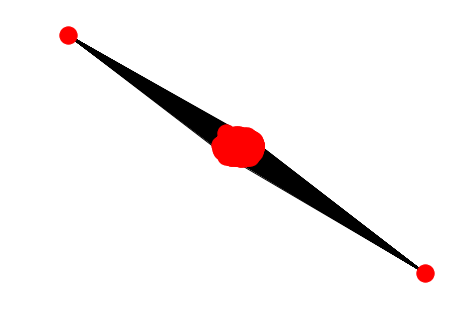

In [23]:
##### apply Spring-force
#######################
pos = nx.spring_layout(G, k = None, dim = 3, scale = 1.0)
nx.draw_spring(G, k = 30, dim = 2, scale = 1.0, iterations =1500)
plt.show()

In [ ]:
##### APPLY community detector
# maximize betweenness and modularity
##################################


In [12]:
##### LOAD IN DATA
###################
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns
# 